[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20Análisis%20Estadístico%20de%20Datos/notebooks/exercises/6_Practica_WS.ipynb)

# Análisis Comparativo del Índice de Calidad de Vida: México vs Países Mejor Clasificados

En este ejercicio realizamos una extracción automatizada de datos (web scraping) desde el portal **[Numbeo](https://www.numbeo.com/quality-of-life/rankings_by_country.jsp)**, una de las bases de datos más confiables del mundo en cuanto a estadísticas de calidad de vida a nivel internacional. A partir de esta información, se construye un análisis comparativo entre **México** y los países mejor posicionados en los últimos años.

| **Índice**                            | **Descripción** |
|----------------------------------------|----------------|
| **Rank**                               | Posición del país en el ranking general de calidad de vida. |
| **Country**                            | Nombre del país analizado. |
| **Quality of Life Index**              | Índice general de calidad de vida (ponderación de varios factores). |
| **Purchasing Power Index**             | Capacidad adquisitiva de los ciudadanos en relación con el costo de vida. |
| **Safety Index**                        | Nivel de seguridad y criminalidad en el país. |
| **Health Care Index**                   | Calidad y acceso a los servicios de salud. |
| **Cost of Living Index**                | Comparación del costo de vida con respecto a otros países. |
| **Property Price to Income Ratio**      | Relación entre el precio de la vivienda y el ingreso promedio. |
| **Traffic Commute Time Index**          | Tiempo promedio de desplazamiento en el tráfico. |
| **Pollution Index**                     | Niveles de contaminación ambiental en el país. |
| **Climate Index**                       | Evaluación del clima y condiciones meteorológicas en la región. |
| **Year**                                | Año en que se recopilaron los datos. |

---

## Objetivo General

Comparar el desempeño de **México** frente al **Top 5 de países mejor rankeados** en el **Índice de Calidad de Vida (Quality of Life Index)** durante los últimos años, utilizando visualizaciones que nos permitan detectar patrones, brechas y oportunidades de mejora.

---

## Metodología

###. **Extracción de Datos**

Utilizamos la librería `requests` para conectarnos con la página de Numbeo, donde se publican rankings semestrales (primera mitad y segunda mitad del año) de calidad de vida por país.  
Los datos extraídos se procesan con `BeautifulSoup` y se almacenan en una estructura tipo tabla usando `pandas`.
A lo largo del ejercicio, aplicarás conceptos fundamentales como:  
✔️ **Web Scraping con `requests` y `BeautifulSoup`**  
✔️ **Manipulación y limpieza de datos con `pandas`**  
✔️ **Análisis Exploratorio de Datos (EDA)**  
✔️ **Generación y exportación de datos estructurados en `CSV`**  


### 2. **Transformación y Preparación**

- Convertimos los datos extraídos a tipos adecuados (`float`, `int`, `str`) para su análisis.
- Filtramos los registros para separar dos subconjuntos clave:
  -  **México**
  -  **Top 5 de países** por cada año.
- Creamos un nuevo DataFrame comparativo uniendo ambos conjuntos.

---

##  Análisis Visual

###  1. Gráfico de Dispersión (Scatterplot)

Se muestra cómo evoluciona el Índice de Calidad de Vida en el tiempo, diferenciando a México con un marcador especial y comparándolo con los países top 5 de cada año. Esta visualización permite ver si la brecha se ha ampliado, reducido o mantenido estable.

###  2. Gráfico de Barras por Año más Reciente

Mostramos los valores del índice para **el año más reciente disponible** (por ejemplo, 2025), y comparamos directamente el valor de México con los países del Top 5 en ese mismo periodo. Esto ofrece una vista instantánea del lugar que ocupa México en el ranking actual.

---

##  Indicadores Analizados

- **Quality of Life Index:** Índice general compuesto por varios factores como poder adquisitivo, salud, seguridad, contaminación y más. A mayor valor, mayor calidad de vida estimada.

---

##  Conclusión Esperada

Este ejercicio no solo permite evaluar el lugar de México en el contexto global, sino también observar **qué países mantienen una calidad de vida elevada de forma consistente**, y **cómo ha sido el desempeño histórico de México** frente a estos referentes.

---

> Esta metodología puede replicarse fácilmente para otros índices específicos, como:
> - 🏥 Health Care Index  
> - 🛡️ Safety Index  
> - 💸 Purchasing Power Index  
> - 🌫️ Pollution Index  
> - 🌤️ Climate Index



In [45]:
# Importamos las librerías necesarias
import requests  # Para hacer solicitudes HTTP y obtener datos de la web
from bs4 import BeautifulSoup  # Para analizar HTML y extraer información
import pandas as pd  # Para manipulación de datos en tablas
from datetime import datetime  # Para trabajar con fechas y tiempos
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos el encabezado 'User-Agent' para evitar bloqueos por parte de la página web
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# 🔹 Determinamos el rango de años a analizar
current_year = datetime.now().year  # Obtiene el año actual
starting_year = current_year - 10  # Calcula el primer año (últimos 10 años)

# Creamos una lista vacía para almacenar la información extraída
data =[]

# 🔹 Iteramos sobre los últimos 10 años, analizando cada uno
for year in range(starting_year, starting_year + 20):
    for half in ["", "-mid"]:  # "" para el primer semestre, "-mid" para el segundo semestre
        formatted_year = f"{year}{half}"  # Formateamos el año correctamente para el URL

        # Evita analizar el segundo semestre del año actual, ya que puede no tener datos aún
        if formatted_year == (str(current_year) + 'mid'):
            continue

        # Construimos la URL del sitio web de Numbeo
        url = f"https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title={formatted_year}"


        # Hacemos la solicitud HTTP al sitio web
        response = requests.get(url, headers = HEADERS)

        # Si la respuesta es incorrecta, genera un error para detener el programa
        response.raise_for_status()

        # Parseamos el contenido HTML usando BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Buscamos la tabla que contiene los datos
        table = soup.find('tbody')
        if not table:  # Si no hay tabla, pasamos al siguiente año
            continue

        # Definimos los nombres de las columnas que tendrán nuestros datos
        headers = ["Rank",
                   "Country",
                   "Quality of Life Index",
                   "Purchasing Power Index",
                   "Safety Index",
                   "Health Care Index",
                   "Cost of Living Index",
                   "Property Price to Income Ratio",
                   "Traffic Commute Time Index",
                   "Pollution Index",
                    "Climate Index",
                    "Year"]

        rank = 1  # Inicializamos el ranking para cada año

        # 🔹 Extraemos los datos fila por fila
        for row in table.find_all('tr'):
            columns = row.find_all('td')

            # Si la primera columna está vacía, asignamos manualmente el ranking
            if columns and columns[0].text.strip() == "":
                rank_value = rank  # Asignamos el ranking manualmente
                columns = columns[1:]  # Eliminamos la primera celda vacía
            else:
                rank_value = rank  # Usamos el ranking normal

            # Verificamos que la cantidad de columnas sea correcta antes de procesarlas
            if len(columns) == len(headers) - 2:  # -2 porque agregamos Rank y Year manualmente
                row_data = [rank_value] + [col.text.strip() for col in columns]  # Extraemos y limpiamos los datos

                # 🔹 Ajustamos el formato del año
                if half == "-mid":
                    row_data.append(f"{year}/2")  # Convertimos "2015-mid" en "2015/2"
                else:
                    row_data.append(str(year))  # Mantenemos el año normal

                # Guardamos la fila en la lista de datos
                data.append(row_data)
                rank += 1  # Incrementamos el ranking

# 🔹 Convertimos la lista en un DataFrame de Pandas
df = pd.DataFrame(data, columns=headers)

# 🔹 Guardamos el DataFrame en un archivo CSV
csv_df = "headers_quality.csv"
df.to_csv(csv_df, index=False, encoding='utf-8')

# 🔹 Mostramos el DataFrame resultante
df.head(10)

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
0,1,Switzerland,222.9,146.5,73.2,66.3,126.0,7.3,25.6,24.1,-,2015
1,2,Germany,195.9,111.8,71.5,75.6,76.3,6.6,31.1,28.3,-,2015
2,3,Sweden,193.9,110.9,57.9,76.3,82.9,9.2,26.9,15.1,-,2015
3,4,United States,192.5,126.1,50.0,67.8,76.5,2.6,36.0,31.4,-,2015
4,5,Finland,190.2,101.2,70.5,69.4,89.7,7.0,33.2,14.9,-,2015
5,6,Denmark,190.2,105.7,74.3,79.3,100.6,5.0,27.8,31.8,-,2015
6,7,Austria,182.6,104.6,73.8,78.4,76.9,9.6,25.9,34.0,-,2015
7,8,Australia,180.8,110.4,57.8,71.9,99.3,7.1,36.2,21.6,-,2015
8,9,Canada,177.6,105.1,62.5,69.6,81.8,5.5,38.9,27.3,-,2015
9,10,New Zealand,175.5,91.0,60.2,72.6,93.7,5.8,28.1,17.6,-,2015


In [46]:
# Asegurarnos de que las columnas necesarias estén en el tipo correcto
df["Year"] = df["Year"].astype(str)
print( "YEAR es de tipo:", df["Year"].dtype)

df ["Rank"] = pd.to_numeric(df["Rank"], errors="coerce") #tipo numerico y si no hay les pone n/a
#print(df["Rank"])
df["Quality of Life Index"] = pd.to_numeric(df["Quality of Life Index"], errors="coerce") #hace lo mismo con esta variable
#df["Quality of Life Index"]


YEAR es de tipo: object


In [47]:
# Crear DataFrame de México
df_mexico = df[df [ "Country"]== "Mexico"].copy()
df_mexico.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 45 to 1549
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            21 non-null     int64  
 1   Country                         21 non-null     object 
 2   Quality of Life Index           21 non-null     float64
 3   Purchasing Power Index          21 non-null     object 
 4   Safety Index                    21 non-null     object 
 5   Health Care Index               21 non-null     object 
 6   Cost of Living Index            21 non-null     object 
 7   Property Price to Income Ratio  21 non-null     object 
 8   Traffic Commute Time Index      21 non-null     object 
 9   Pollution Index                 21 non-null     object 
 10  Climate Index                   21 non-null     object 
 11  Year                            21 non-null     object 
dtypes: float64(1), int64(1), object(10)
memo

In [65]:
# Obtener el top 5 de cada año
df_top5= df[df["Rank"] <= 5]
df_top5 = df[df["Rank"].notna() & (df["Rank"] <= 5)].head(5)
#df_top5 = df.sort_values(by="Rank").dropna(subset=["Rank"]).head(5)
df_top5

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
0,1,Switzerland,222.9,146.5,73.2,66.3,126.0,7.3,25.6,24.1,-,2015
1,2,Germany,195.9,111.8,71.5,75.6,76.3,6.6,31.1,28.3,-,2015
2,3,Sweden,193.9,110.9,57.9,76.3,82.9,9.2,26.9,15.1,-,2015
3,4,United States,192.5,126.1,50.0,67.8,76.5,2.6,36.0,31.4,-,2015
4,5,Finland,190.2,101.2,70.5,69.4,89.7,7.0,33.2,14.9,-,2015


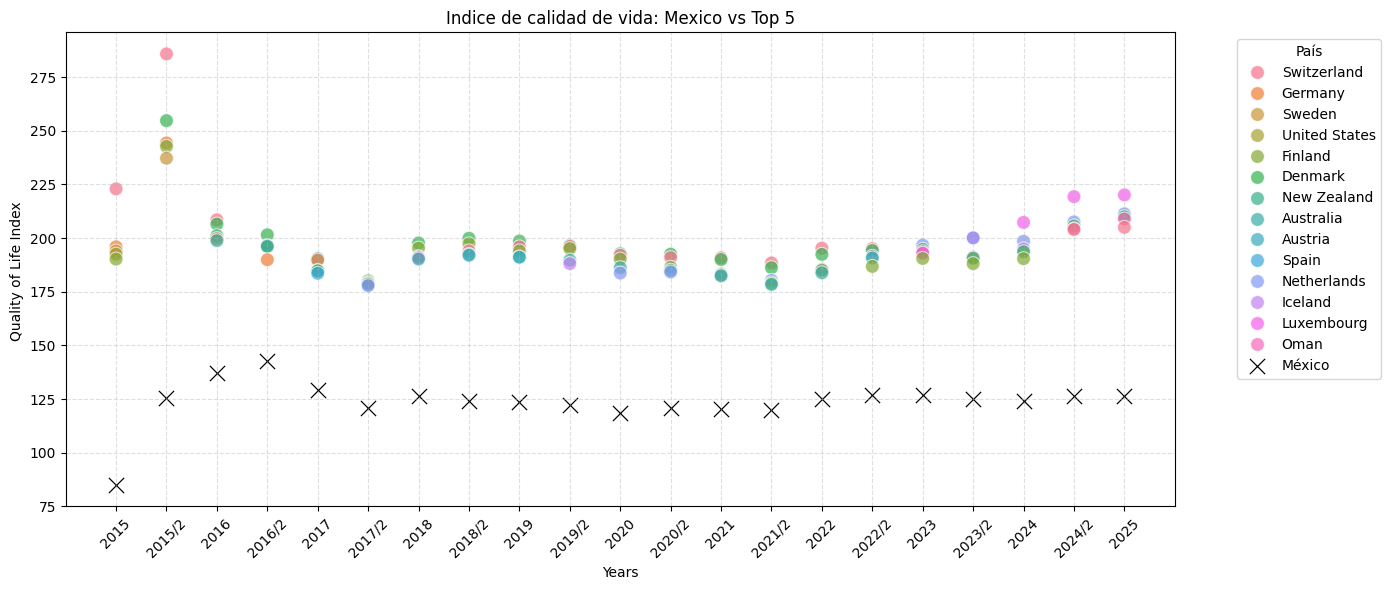

In [64]:
from datetime import datetime  # Para trabajar con fechas y tiempos
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión (scatterplot) para México vs Top 5 en el tiempo
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df_top5, x="Year", y="Quality of Life Index", hue="Country", s=100, alpha=0.7)
sns.scatterplot(data=df_mexico, x="Year" , y="Quality of Life Index",color="black", s=120, label="México", marker="x")
plt.title("Indice de calidad de vida: Mexico vs Top 5")
plt.xlabel("Years")
plt.ylabel("Quality of Life Index ")
plt.xticks(rotation=45)
plt.legend(title="País", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


In [69]:
# Unir México con el top 5
df_comparacion_mexico_top5 = pd.concat([df_mexico, df_top5], ignore_index=True)
df_comparacion_mexico_top5.head(7)

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
0,46,Mexico,85.0,59.5,46.2,67.8,41.3,6.3,36.9,68.8,-,2015
1,33,Mexico,125.6,91.4,47.0,69.1,38.1,5.7,33.4,64.9,-,2015/2
2,39,Mexico,137.0,76.5,49.2,68.1,35.0,6.2,37.1,64.6,58.8,2016
3,33,Mexico,142.8,66.9,49.6,68.0,33.1,6.6,38.9,66.8,82.5,2016/2
4,45,Mexico,129.1,60.1,49.7,70.1,29.8,6.9,41.7,66.7,60.7,2017
5,38,Mexico,120.7,51.4,49.4,69.8,36.3,7.0,39.8,66.5,78.4,2017/2
6,43,Mexico,126.4,58.2,48.9,68.6,33.6,7.8,42.0,66.1,82.5,2018


In [72]:
# Comparación directa para el año más reciente (2025 o el más alto disponible)
latest_year = df_comparacion_mexico_top5["Year"].max()
print(latest_year)


2025


In [77]:
df_2025 = df_comparacion_mexico_top5[df_comparacion_mexico_top5["Year"]== latest_year]
df_2025

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
20,55,Mexico,126.3,48.3,46.6,72.5,34.5,11.8,39.1,58.4,85.3,2025


In [86]:
# Ordenar por ICV
df_2025q =  df_2025.sort_values(by="Quality of Life Index", ascending=False)
df_2025q


,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
20,55,Mexico,126.3,48.3,46.6,72.5,34.5,11.8,39.1,58.4,85.3,2025


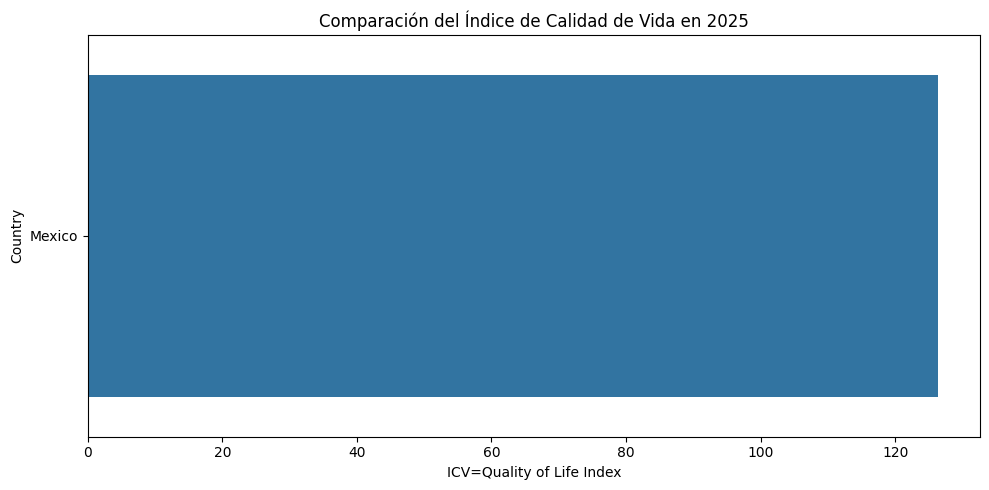

In [89]:
# Gráfico de comparación para el año más reciente
plt.figure(figsize=(10, 5))
sns.barplot(data=df_2025q , x="Quality of Life Index", y="Country")

plt.title(f"Comparación del Índice de Calidad de Vida en {latest_year}")
plt.xlabel("ICV=Quality of Life Index")
plt.ylabel("Country")
plt.tight_layout()
plt.show()